In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator, ScalarFormatter
from matplotlib.ticker import FixedLocator, ScalarFormatter
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython
import imgkit
import scipy.special

# Neat CNF Suspensions 
# Concentration dependence

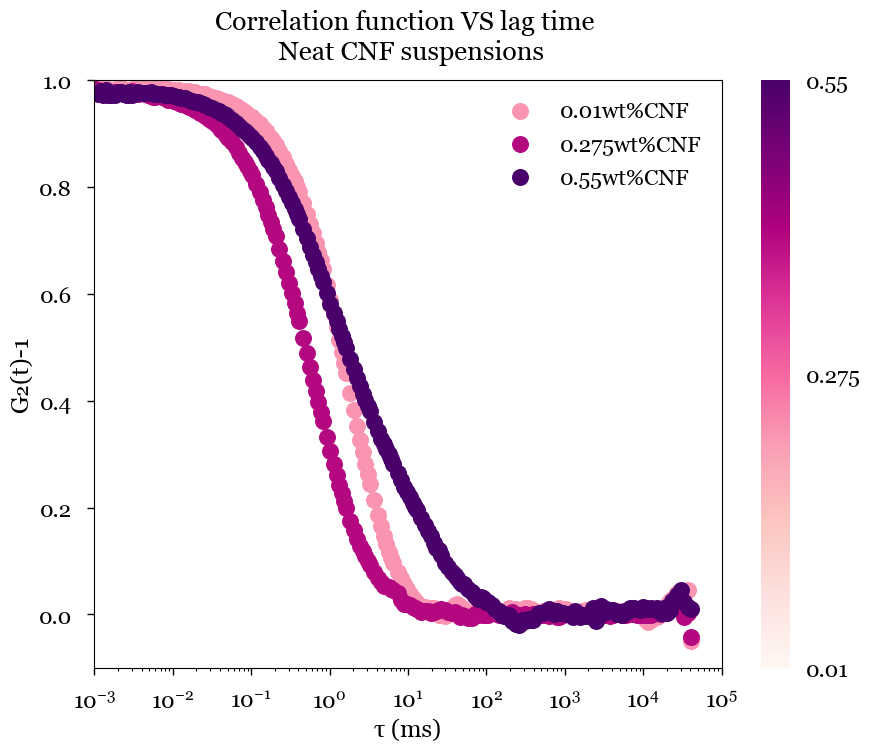

In [170]:
# Neat CNF Suspensions at 65.1 degree, 20C, 2D Autocorrelation
# Import Correlation Function data 
cnf001 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.01CNF/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

cnf0275 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF0mMNaCl/Measurement 2/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

cnf055 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.55CNF/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001 = cnf001.iloc[28:,0]
lagtime_cnf001_ms = lagtime_cnf001  * 1000
corrfx_cnf001 = cnf001.iloc[28:,1]

lagtime_cnf0275 = cnf0275.iloc[28:,0]
lagtime_cnf0275_ms = lagtime_cnf0275  * 1000
corrfx_cnf0275 = cnf0275.iloc[28:,1]

lagtime_cnf055 = cnf055.iloc[28:,0]
lagtime_cnf055_ms = lagtime_cnf055  * 1000
corrfx_cnf055 = cnf055.iloc[28:,1]

lagtime_neatCNF = [lagtime_cnf001_ms, lagtime_cnf0275_ms, lagtime_cnf055_ms]
corrfx_neatCNF = [corrfx_cnf001, corrfx_cnf0275, corrfx_cnf055]
label_neatCNF = ['0.01wt%CNF', '0.275wt%CNF', '0.55wt%CNF']
conc_neatCNF = [0.01, 0.275,  0.55]

cmap = plt.get_cmap('RdPu')
start_index = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(lagtime_neatCNF, corrfx_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(lagtime_neatCNF))
    scatter1 = ax.scatter(x, y,marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

# Add a colorbar that matches the colormap
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.outline.set_visible(False)

# Set custom tick labels on the colorbar
ticks = np.linspace(0, 1, len(conc_neatCNF))
tick_labels = conc_neatCNF
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time \n Neat CNF suspensions', pad=15)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions (1.5mmolPg) 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight',  transparent=True)
plt.show()

In [171]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001 = lagtime_cnf001_ms
g_t_cnf001 = corrfx_cnf001
t_cnf0275 = lagtime_cnf0275_ms
g_t_cnf0275 = corrfx_cnf0275
t_cnf055 = lagtime_cnf055_ms
g_t_cnf055 = corrfx_cnf055

p0 = [1, 1,1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params_cnf001, cov_cnf001 = curve_fit(g, t_cnf001, g_t_cnf001, p0, bounds=bounds)
A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001 = params_cnf001

params_cnf0275, cov_cnf0275 = curve_fit(g, t_cnf0275, g_t_cnf0275, p0, bounds=bounds)
A_fit_cnf0275, tau_fit_cnf0275, beta_fit_cnf0275 = params_cnf0275

params_cnf055, cov_cnf055 = curve_fit(g, t_cnf055, g_t_cnf055, p0, bounds=bounds)
A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055 = params_cnf055
    
# Table using DataFrame
samples_neatCNF = ['0.01wt.% CNF', '0.275wt.% CNF', '0.55wt.% CNF']
A_fitted_neatCNF = [A_fit_cnf001, A_fit_cnf0275, A_fit_cnf055]
t_fitted_neatCNF = [tau_fit_cnf001, tau_fit_cnf0275, tau_fit_cnf055]
beta_fitted_neatCNF =  [beta_fit_cnf001, beta_fit_cnf0275, beta_fit_cnf055]

# mean tau calculations
meantau_neatCNF_name = ["meantau_0.01wt.%CNF", "meantau_0.275wt.%CNF", "meantau_0.55wt.%CNF"]
meantau_neatCNFs = {}
for i in range(len(t_fitted_neatCNF)):
    meantau_neatCNF = (t_fitted_neatCNF[i]/beta_fitted_neatCNF[i])*scipy.special.gamma(1/beta_fitted_neatCNF[i])
    name = meantau_neatCNF_name[i]
    meantau_neatCNFs[name] = meantau_neatCNF

meantau_neatCNF = np.array(list(meantau_neatCNFs.values()))

table_Parameters_neatCNF = {
    '': samples_neatCNF,
    'A' : A_fitted_neatCNF,
    '\u03C4 (ms)': t_fitted_neatCNF,
    '\u03B2': beta_fitted_neatCNF,
    '<\u03C4> (ms)': meantau_neatCNF
}

table_Parameters_neatCNF_draw = pd.DataFrame(table_Parameters_neatCNF)

styled_table_Parameters_neatCNF_draw = table_Parameters_neatCNF_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='RdPu') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_neatCNF_draw           


,A,τ (ms),β,<τ> (ms)
0.01wt.% CNF,0.992,2.241,0.853,2.43
0.275wt.% CNF,0.997,0.863,0.734,1.05
0.55wt.% CNF,1.000,4.153,0.511,7.98


In [172]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_neatCNF = styled_table_Parameters_neatCNF_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_neatCNF)
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 2,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
# Save the HTML table as a PNG image
#imgkit.from_file('temp.html', 'Table of Fitted Parameters for Neat CNF Suspensions.png', options=options)

True

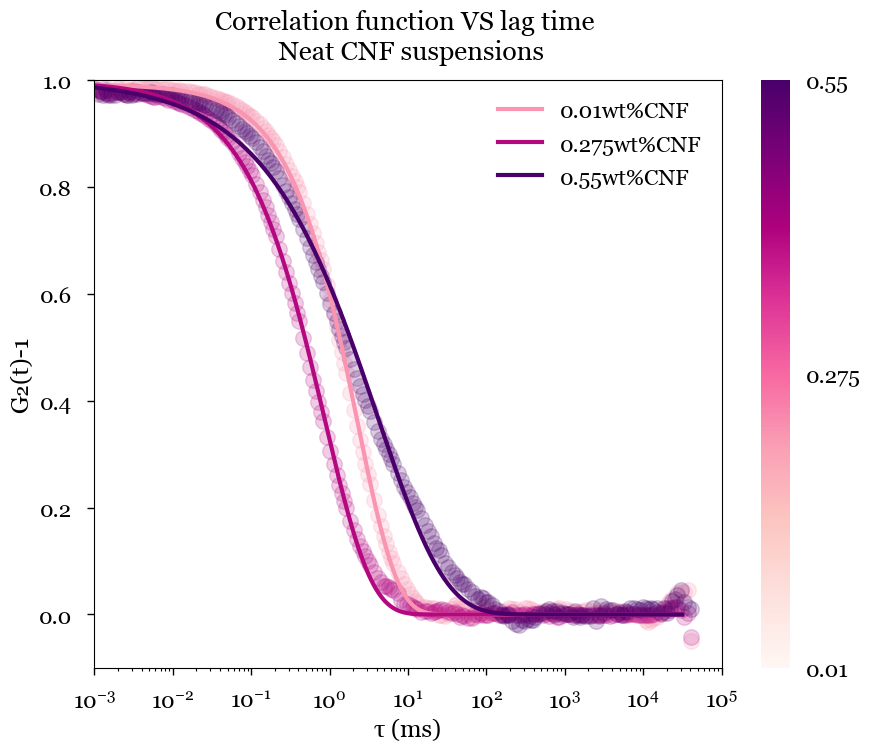

In [190]:
# Plot the fitting

t_fit_cnf001 = np.logspace(-3, 4.5, 1000)
g_fit_cnf001 = g(t_fit_cnf001, A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001)

t_fit_cnf0275 = np.logspace(-3, 4.5, 1000)
g_fit_cnf0275 = g(t_fit_cnf0275, A_fit_cnf0275, tau_fit_cnf0275, beta_fit_cnf0275)

t_fit_cnf055 = np.logspace(-3, 4.5, 1000)
g_fit_cnf055 = g(t_fit_cnf055, A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055)

t_fit_neatCNF = [t_fit_cnf001, t_fit_cnf0275, t_fit_cnf055]
g_fit_neatCNF = [g_fit_cnf001, g_fit_cnf0275, g_fit_cnf055]

cmap = plt.get_cmap('RdPu')
start_index = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, y1, x2, y2, label) in enumerate(zip(lagtime_neatCNF, corrfx_neatCNF, t_fit_neatCNF, g_fit_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(lagtime_neatCNF))
    scatter1 = ax.scatter(x1, y1, marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=1)
    fitting = ax.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3, label=label)

# Add a colorbar that matches the colormap
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.outline.set_visible(False)

# Set custom tick labels on the colorbar
ticks = np.linspace(0, 1, len(conc_neatCNF))
tick_labels = conc_neatCNF
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time \n Neat CNF suspensions', pad=15)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg fit.png", dpi=1500, bbox_inches='tight', transparent=True)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg fit wbg.png", dpi=1500, bbox_inches='tight')
plt.show()


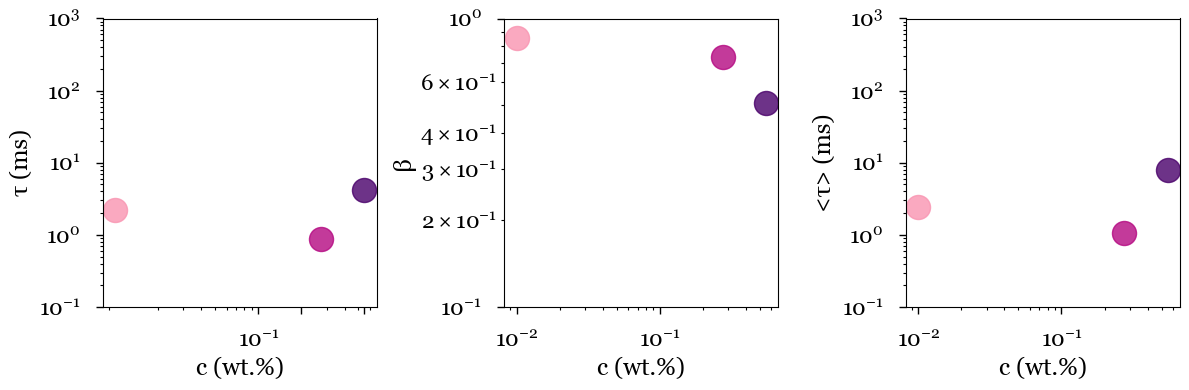

In [181]:
cnf_conc = [0.01, 0.275, 0.55]
beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf0275, beta_fit_cnf055])
tau_neatCNF = np.array([tau_fit_cnf001, tau_fit_cnf0275, tau_fit_cnf055])

cmap = plt.get_cmap('RdPu')
start_index = 1.2

plt.style.use('_mpl-gallery-nogrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x, y1, y2, y3, label) in enumerate(zip(cnf_conc, tau_neatCNF, beta_neatCNF, meantau_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(cnf_conc))
    scatter1 = axes[0].scatter(x, y1, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter2 = axes[1].scatter(x, y2, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter3 = axes[2].scatter(x, y3, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
#axes[0].set_ylim(1, 6)
axes[0].set_ylim(0.1, 1000)
axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xticks([0.1, 0.2, 0.55])
#axes[0].set_xticks([0, 0.25, 0.5])
#axes[0].set_yticks([1, 3, 5, 6])

axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1, 1)
#axes[1].set_xticks([0.1, 0.2, 0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
#axes[2].set_xticks([0.1, 0.2, 0.55])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_yscale("log")
axes[2].set_xscale("log")

plt.tight_layout()
#plt.savefig("Parameter as a function of CNF concentration for Neat CNF suspensions 2DAuto 65.1deg loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

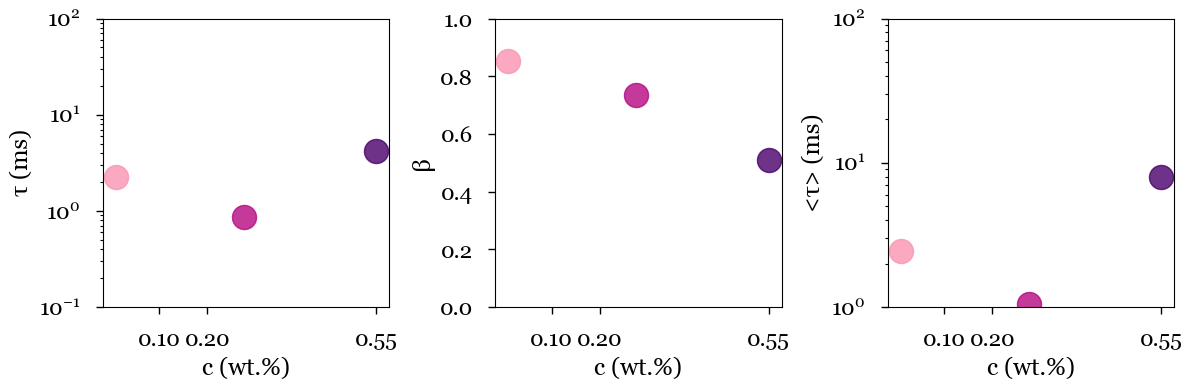

In [175]:
cmap = plt.get_cmap('RdPu')
start_index = 1.2

plt.style.use('_mpl-gallery-nogrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x, y1, y2, y3, label) in enumerate(zip(cnf_conc, tau_neatCNF, beta_neatCNF, meantau_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(cnf_conc))
    scatter1 = axes[0].scatter(x, y1, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter2 = axes[1].scatter(x, y2, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter3 = axes[2].scatter(x, y3, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
#axes[0].set_ylim(1, 6)
axes[0].set_ylim(0.1, 100)
axes[0].set_yscale("log")
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xticks([0.1, 0.2, 0.55])
#axes[0].set_xticks([0, 0.25, 0.5])
#axes[0].set_yticks([1, 3, 5, 6])

axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0, 1)
axes[1].set_xticks([0.1, 0.2, 0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(1,100)
axes[2].set_xticks([0.1, 0.2, 0.55])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameter as a function of CNF concentration for Neat CNF suspensions 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

# 0.01CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

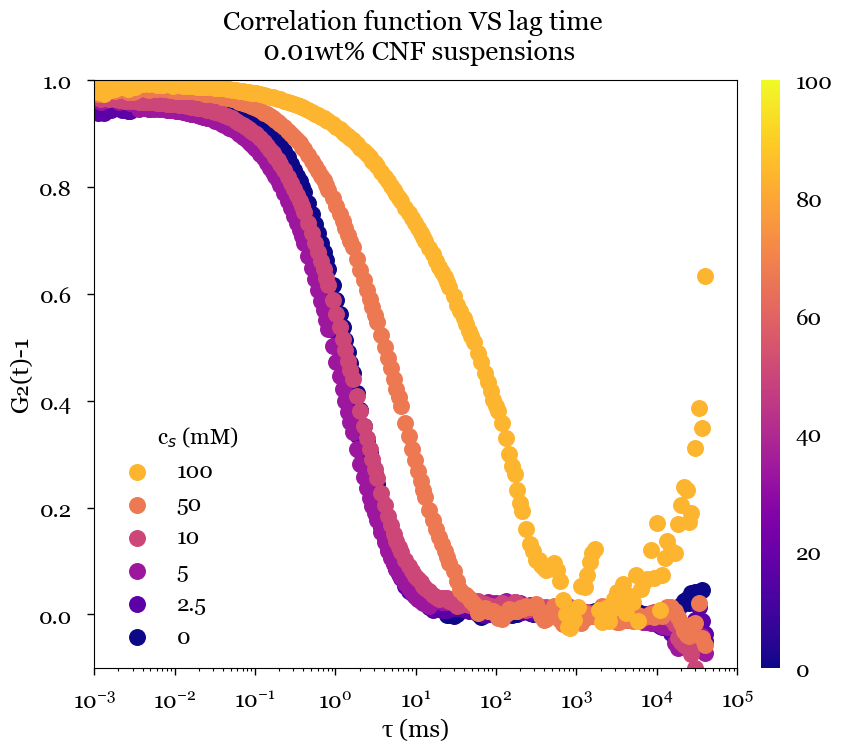

In [182]:
cnf001_110_150 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.01CNF/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF2.5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF10NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF50NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF100NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0nacl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0nacl_ms = lagtime_cnf001_110_150_0nacl*1000
corrfx_cnf001_110_150_0nacl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025nacl = cnf001_110_150_025nacl.iloc[28:,0]
lagtime_cnf001_110_150_025nacl_ms = lagtime_cnf001_110_150_025nacl*1000
corrfx_cnf001_110_150_025nacl = cnf001_110_150_025nacl.iloc[28:,1]

lagtime_cnf001_110_150_050nacl = cnf001_110_150_050nacl.iloc[28:,0]
lagtime_cnf001_110_150_050nacl_ms = lagtime_cnf001_110_150_050nacl*1000
corrfx_cnf001_110_150_050nacl = cnf001_110_150_050nacl.iloc[28:,1]

lagtime_cnf001_110_150_100nacl = cnf001_110_150_100nacl.iloc[28:,0]
lagtime_cnf001_110_150_100nacl_ms = lagtime_cnf001_110_150_100nacl*1000
corrfx_cnf001_110_150_100nacl = cnf001_110_150_100nacl.iloc[28:,1]

lagtime_cnf001_110_150_500nacl = cnf001_110_150_500nacl.iloc[28:,0]
lagtime_cnf001_110_150_500nacl_ms = lagtime_cnf001_110_150_500nacl*1000
corrfx_cnf001_110_150_500nacl = cnf001_110_150_500nacl.iloc[28:,1]

lagtime_cnf001_110_150_1000nacl = cnf001_110_150_1000nacl.iloc[28:,0]
lagtime_cnf001_110_150_1000nacl_ms = lagtime_cnf001_110_150_1000nacl*1000
corrfx_cnf001_110_150_1000nacl = cnf001_110_150_1000nacl.iloc[28:,1]

t_cnf001_110_150 = [lagtime_cnf001_110_150_0nacl_ms, lagtime_cnf001_110_150_025nacl_ms, lagtime_cnf001_110_150_050nacl_ms,
                   lagtime_cnf001_110_150_100nacl_ms, lagtime_cnf001_110_150_500nacl_ms, lagtime_cnf001_110_150_1000nacl_ms]
g_cnf001_110_150 = [corrfx_cnf001_110_150_0nacl, corrfx_cnf001_110_150_025nacl, corrfx_cnf001_110_150_050nacl,
                   corrfx_cnf001_110_150_100nacl, corrfx_cnf001_110_150_500nacl, corrfx_cnf001_110_150_1000nacl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]

cmap = plt.get_cmap('plasma')

fig, ax = plt.subplots(figsize=(8,6))

for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150, g_cnf001_110_150, label_110_150)):
    c = cmap(float(idx) / len(t_cnf001_110_150))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

salt_conc001_110_150 = label_110_150

min_value = min(np.min(salt_conc001_110_150[i]) for i in range(len(salt_conc001_110_150)))
max_value = max(np.max(salt_conc001_110_150[i]) for i in range(len(salt_conc001_110_150)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)
cbar.outline.set_visible(False)

handles, labels = ax.get_legend_handles_labels()

handles = handles[::-1]
labels = labels[::-1]

ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions (1.50mmol COONa) at 65.1deg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

In [183]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0nacl = lagtime_cnf001_110_150_0nacl_ms
g_t_cnf001_110_150_0nacl = corrfx_cnf001_110_150_0nacl
t_cnf001_110_150_025nacl = lagtime_cnf001_110_150_025nacl_ms
g_t_cnf001_110_150_025nacl = corrfx_cnf001_110_150_025nacl
t_cnf001_110_150_050nacl = lagtime_cnf001_110_150_050nacl_ms
g_t_cnf001_110_150_050nacl = corrfx_cnf001_110_150_050nacl
t_cnf001_110_150_100nacl = lagtime_cnf001_110_150_100nacl_ms
g_t_cnf001_110_150_100nacl = corrfx_cnf001_110_150_100nacl
t_cnf001_110_150_500nacl = lagtime_cnf001_110_150_500nacl_ms
g_t_cnf001_110_150_500nacl = corrfx_cnf001_110_150_500nacl
t_cnf001_110_150_1000nacl = lagtime_cnf001_110_150_1000nacl_ms
g_t_cnf001_110_150_1000nacl = corrfx_cnf001_110_150_1000nacl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0nacl, cov_cnf001_110_150_0nacl = curve_fit(g, t_cnf001_110_150_0nacl, g_t_cnf001_110_150_0nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_0nacl = params_cnf001_110_150_0nacl

params_cnf001_110_150_025nacl, cov_cnf001_110_150_025nacl = curve_fit(g, t_cnf001_110_150_025nacl, g_t_cnf001_110_150_025nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_025nacl = params_cnf001_110_150_025nacl

params_cnf001_110_150_050nacl, cov_cnf001_110_150_050nacl = curve_fit(g, t_cnf001_110_150_050nacl, g_t_cnf001_110_150_050nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_050nacl = params_cnf001_110_150_050nacl

params_cnf001_110_150_100nacl, cov_cnf001_110_150_100nacl = curve_fit(g, t_cnf001_110_150_100nacl, g_t_cnf001_110_150_100nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_100nacl = params_cnf001_110_150_100nacl

params_cnf001_110_150_500nacl, cov_cnf001_110_150_500nacl = curve_fit(g, t_cnf001_110_150_500nacl, g_t_cnf001_110_150_500nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_500nacl = params_cnf001_110_150_500nacl

params_cnf001_110_150_1000nacl, cov_cnf001_110_150_1000nacl = curve_fit(g, t_cnf001_110_150_1000nacl, g_t_cnf001_110_150_1000nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000nacl, tau_fit_cnf001_110_150_1000nacl, beta_fit_cnf001_110_150_1000nacl = params_cnf001_110_150_1000nacl

# Table using DataFrame
samples_001CNF_110_150_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl', '50mM NaCl', '100mM NaCl']
A_fitted_001CNF_110_150_NaCl = [A_fit_cnf001_110_150_0nacl, A_fit_cnf001_110_150_025nacl, A_fit_cnf001_110_150_050nacl, A_fit_cnf001_110_150_100nacl, A_fit_cnf001_110_150_500nacl, A_fit_cnf001_110_150_1000nacl]
t_fitted_001CNF_110_150_NaCl = [tau_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_1000nacl]
beta_fitted_001CNF_110_150_NaCl =  [beta_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_1000nacl]

# mean tau calculations
meantau_cnf001s_110_150_nacl = ["meantau_0.01wt.%CNF_0mMnacl", "meantau_0.01wt.%CNF_2.5mMnacl", "meantau_0.01wt.%CNF_5mMnacl", "meantau_0.01wt.%CNF_10mMnacl", "meantau_0.01wt.%CNF_50mMnacl", "meantau_0.01wt.%CNF_100mMnacl"]
meantau_cnf001s_110_150 = {}
for i in range(len(t_fitted_001CNF_110_150_NaCl)):
    meantau_cnf001_110_150 = (t_fitted_001CNF_110_150_NaCl[i]/beta_fitted_001CNF_110_150_NaCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_NaCl[i])
    name = meantau_cnf001s_110_150_nacl[i]
    meantau_cnf001s_110_150[name] = meantau_cnf001_110_150
    
meantau_001CNF_110_150 = np.array(list(meantau_cnf001s_110_150.values()))

table_Parameters_001CNF_110_150_NaCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_NaCl ,
    'A' : A_fitted_001CNF_110_150_NaCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_NaCl,
    '\u03B2': beta_fitted_001CNF_110_150_NaCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150
}

table_Parameters_001CNF_110_150_NaCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_NaCl)

styled_table_Parameters_001CNF_110_150_NaCl_draw = table_Parameters_001CNF_110_150_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Purples') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_NaCl_draw           

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM NaCl,0.992,2.24,0.853,2.43
2.5mM NaCl,0.958,1.81,0.826,2.00
5mM NaCl,0.971,1.63,0.770,1.90
10mM NaCl,0.974,2.32,0.761,2.73
50mM NaCl,0.993,7.23,0.686,9.33
100mM NaCl,0.993,96.81,0.549,165.40


In [184]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_NaCl = 'styled_table_Parameters_001CNF_110_150_NaCl_draw.html'
styled_table_Parameters_001CNF_110_150_NaCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_NaCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 1.5,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_NaCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol NaCl.png'
#imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_NaCl, image_table_Parameters_001CNF_110_150_NaCl, options=options)

True

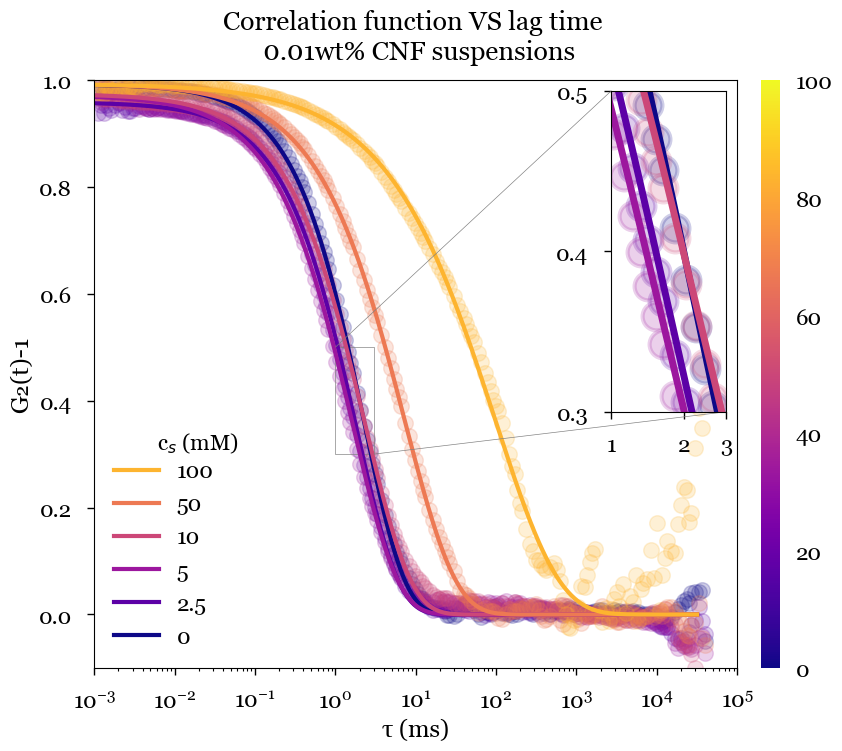

In [187]:
# Plot the fitting

t_fit_cnf001_110_150_0nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0nacl = g(t_fit_cnf001_110_150_0nacl, A_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_0nacl)
t_fit_cnf001_110_150_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025nacl = g(t_fit_cnf001_110_150_025nacl, A_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_025nacl)
t_fit_cnf001_110_150_050nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050nacl = g(t_fit_cnf001_110_150_050nacl, A_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_050nacl)
t_fit_cnf001_110_150_100nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100nacl = g(t_fit_cnf001_110_150_100nacl, A_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_100nacl)
t_fit_cnf001_110_150_500nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500nacl = g(t_fit_cnf001_110_150_500nacl, A_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_500nacl)
t_fit_cnf001_110_150_1000nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000nacl = g(t_fit_cnf001_110_150_1000nacl, A_fit_cnf001_110_150_1000nacl, tau_fit_cnf001_110_150_1000nacl, beta_fit_cnf001_110_150_1000nacl)

t_fit_cnf001_110_150_nacl = [t_fit_cnf001_110_150_0nacl, t_fit_cnf001_110_150_025nacl, t_fit_cnf001_110_150_050nacl,
                            t_fit_cnf001_110_150_100nacl, t_fit_cnf001_110_150_500nacl, t_fit_cnf001_110_150_1000nacl]

g_fit_cnf001_110_150_nacl = [g_fit_cnf001_110_150_0nacl, g_fit_cnf001_110_150_025nacl, g_fit_cnf001_110_150_050nacl,
                            g_fit_cnf001_110_150_100nacl, g_fit_cnf001_110_150_500nacl, g_fit_cnf001_110_150_1000nacl]

#__________________________________________________________________________________________________
# Create a colormap
cmap = plt.get_cmap('plasma')

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
    c = cmap(float(idx) / len(t_cnf001_110_150))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='-', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150 = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150[i]) for i in range(len(salt_conc001_110_150)))
max_value = max(np.max(salt_conc001_110_150[i]) for i in range(len(salt_conc001_110_150)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
    c = cmap(float(idx) / len(t_cnf001_110_150))
    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='-', color = c, linewidth=5)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = 1, 3, 0.3, 0.5
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
ax_zoom.set_xscale('log')
xticks = [1, 2, 3]
yticks = [0.3,0.4,0.5]
ax_zoom.set_xticks(xticks)
ax_zoom.set_xticklabels(xticks)
ax_zoom.set_yticks(yticks)
ax_zoom.set_yticklabels(yticks)
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.31, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions', pad=15)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNFNaCl at 65.1deg fit zoom.png", dpi=1500, bbox_inches='tight',  transparent=True)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNFNaCl at 65.1deg fit zoom wbg.png", dpi=1500, bbox_inches='tight')
plt.show()

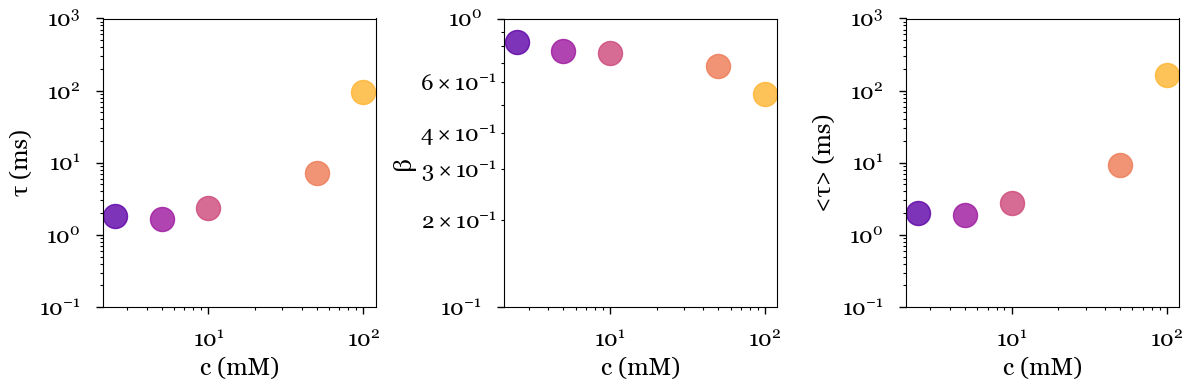

In [192]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150, t_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 1000)
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xscale("log")

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150, beta_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150, meantau_001CNF_110_150, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.01wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

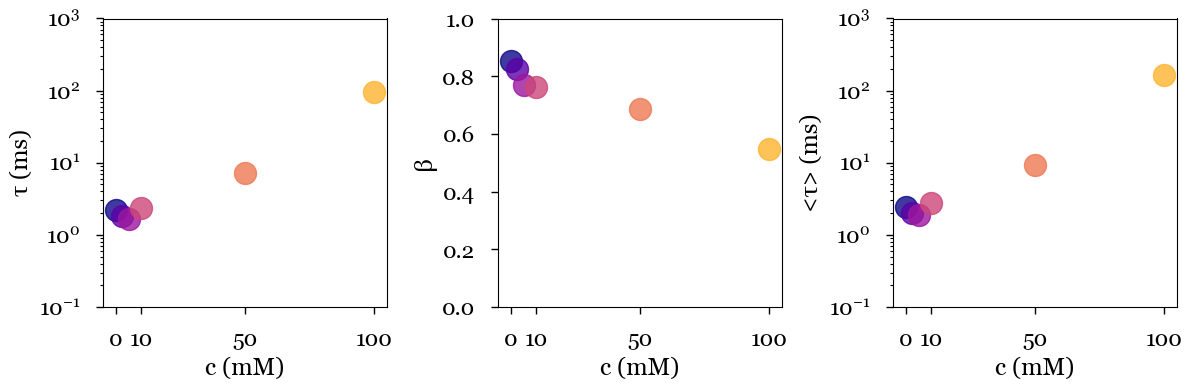

In [193]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150, t_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 1000)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[0].set_xscale("log")

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150, beta_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150, meantau_001CNF_110_150, label_110_150)):
    c = cmap(float(idx) / len(salt_conc001_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_yscale("log")
#axes[2].set_xscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.01wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

# 0.275CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

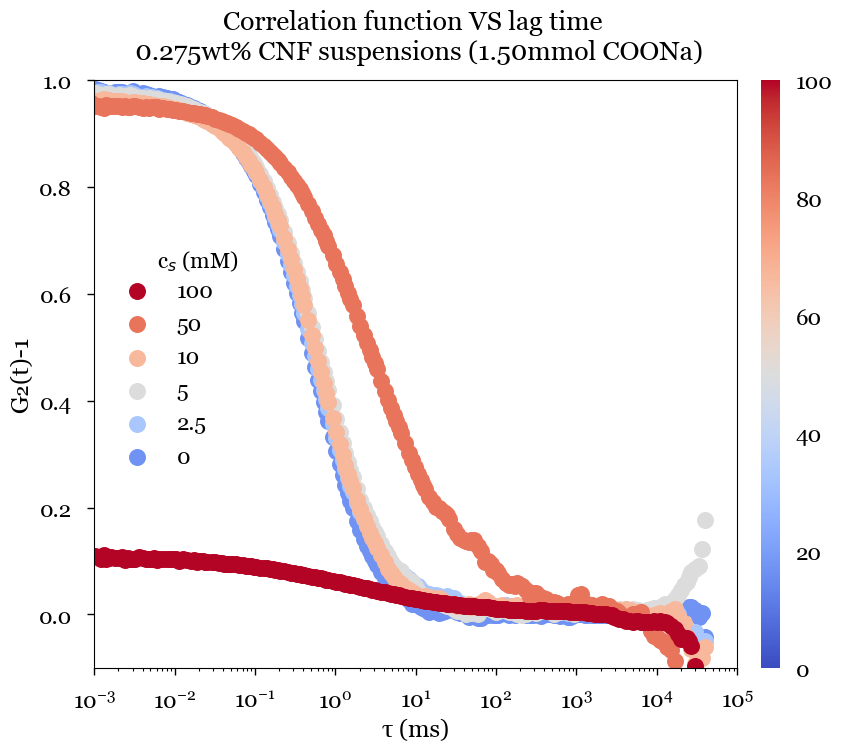

In [194]:
# Import Correlation Function data 

cnf0275_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF2.5mMNaCl/Measurement 2/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf0275_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF5mMNaCl/Measurement 2/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf0275_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF10mMNaCl/Measurement 2/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf0275_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF50mMNaCl/Measurement 2/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf0275_1000nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF100mMNaCl/Measurement 2/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf0275_0nacl = cnf0275.iloc[28:,0]
lagtime_cnf0275_0nacl_ms = lagtime_cnf0275_0nacl*1000
corrfx_cnf0275_0nacl = cnf0275.iloc[28:,1]

lagtime_cnf0275_025nacl = cnf0275_025nacl.iloc[28:,0]
lagtime_cnf0275_025nacl_ms = lagtime_cnf0275_025nacl*1000
corrfx_cnf0275_025nacl = cnf0275_025nacl.iloc[28:,1]

lagtime_cnf0275_050nacl = cnf0275_050nacl.iloc[28:,0]
lagtime_cnf0275_050nacl_ms = lagtime_cnf0275_050nacl*1000
corrfx_cnf0275_050nacl = cnf0275_050nacl.iloc[28:,1]

lagtime_cnf0275_100nacl = cnf0275_100nacl.iloc[28:,0]
lagtime_cnf0275_100nacl_ms = lagtime_cnf0275_100nacl*1000
corrfx_cnf0275_100nacl = cnf0275_100nacl.iloc[28:,1]

lagtime_cnf0275_500nacl = cnf0275_500nacl.iloc[28:,0]
lagtime_cnf0275_500nacl_ms = lagtime_cnf0275_500nacl*1000
corrfx_cnf0275_500nacl = cnf0275_500nacl.iloc[28:,1]

lagtime_cnf0275_1000nacl = cnf0275_1000nacl.iloc[28:,0]
lagtime_cnf0275_1000nacl_ms = lagtime_cnf0275_1000nacl*1000
corrfx_cnf0275_1000nacl = cnf0275_1000nacl.iloc[28:,1]

t_cnf0275_110_150 = [lagtime_cnf0275_0nacl_ms, lagtime_cnf0275_025nacl_ms, lagtime_cnf0275_050nacl_ms,
                   lagtime_cnf0275_100nacl_ms, lagtime_cnf0275_500nacl_ms, lagtime_cnf0275_1000nacl_ms]
g_cnf0275_110_150 = [corrfx_cnf0275_0nacl, corrfx_cnf0275_025nacl, corrfx_cnf0275_050nacl,
                   corrfx_cnf0275_100nacl, corrfx_cnf0275_500nacl, corrfx_cnf0275_1000nacl]
label_cnf0275_110_150 = [0, 2.5, 5, 10, 50, 100]

cmap = plt.get_cmap('coolwarm')
start_index = 1

fig, ax = plt.subplots(figsize=(8,6))

for idx, (x, y, label) in enumerate(zip(t_cnf0275_110_150, g_cnf0275_110_150, label_cnf0275_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
#__________________________________________________________________________________________________
min_value = min(np.min(label_cnf0275_110_150[i]) for i in range(len(label_cnf0275_110_150)))
max_value = max(np.max(label_cnf0275_110_150[i]) for i in range(len(label_cnf0275_110_150)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  
cbar.outline.set_visible(False)

handles, labels = ax.get_legend_handles_labels()

handles = handles[::-1]
labels = labels[::-1]

ax.legend(handles, labels, loc='center left', frameon=False)

ax.text(6E-3, 0.65, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.275wt% CNF suspensions (1.50mmol COONa)', pad=15)
#plt.savefig("Correlation function VS Scattering angle 0.2wt% CNF suspensions (1.50mmol COONa) at 65.1deg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

In [195]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf0275_0nacl = lagtime_cnf0275_0nacl_ms
g_t_cnf0275_0nacl = corrfx_cnf0275_0nacl
t_cnf0275_025nacl = lagtime_cnf0275_025nacl_ms
g_t_cnf0275_025nacl = corrfx_cnf0275_025nacl
t_cnf0275_050nacl = lagtime_cnf0275_050nacl_ms
g_t_cnf0275_050nacl = corrfx_cnf0275_050nacl
t_cnf0275_100nacl = lagtime_cnf0275_100nacl_ms
g_t_cnf0275_100nacl = corrfx_cnf0275_100nacl
t_cnf0275_500nacl = lagtime_cnf0275_500nacl_ms
g_t_cnf0275_500nacl = corrfx_cnf0275_500nacl
t_cnf0275_1000nacl = lagtime_cnf0275_1000nacl_ms
g_t_cnf0275_1000nacl = corrfx_cnf0275_1000nacl

p0 = [1, 1, 1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 1000, 1])

params_cnf0275_0nacl, cov_cnf0275_0nacl = curve_fit(g, t_cnf0275_0nacl, g_t_cnf0275_0nacl, p0, bounds=bounds)
A_fit_cnf0275_0nacl, tau_fit_cnf0275_0nacl, beta_fit_cnf0275_0nacl = params_cnf0275_0nacl

params_cnf0275_025nacl, cov_cnf0275_025nacl = curve_fit(g, t_cnf0275_025nacl, g_t_cnf0275_025nacl, p0, bounds=bounds)
A_fit_cnf0275_025nacl, tau_fit_cnf0275_025nacl, beta_fit_cnf0275_025nacl = params_cnf0275_025nacl

params_cnf0275_050nacl, cov_cnf0275_050nacl = curve_fit(g, t_cnf0275_050nacl, g_t_cnf0275_050nacl, p0, bounds=bounds)
A_fit_cnf0275_050nacl, tau_fit_cnf0275_050nacl, beta_fit_cnf0275_050nacl = params_cnf0275_050nacl

params_cnf0275_100nacl, cov_cnf0275_100nacl = curve_fit(g, t_cnf0275_100nacl, g_t_cnf0275_100nacl, p0, bounds=bounds)
A_fit_cnf0275_100nacl, tau_fit_cnf0275_100nacl, beta_fit_cnf0275_100nacl = params_cnf0275_100nacl

params_cnf0275_500nacl, cov_cnf0275_500nacl = curve_fit(g, t_cnf0275_500nacl, g_t_cnf0275_500nacl, p0, bounds=bounds)
A_fit_cnf0275_500nacl, tau_fit_cnf0275_500nacl, beta_fit_cnf0275_500nacl = params_cnf0275_500nacl

params_cnf0275_1000nacl, cov_cnf0275_1000nacl = curve_fit(g, t_cnf0275_1000nacl, g_t_cnf0275_1000nacl, p0, bounds=bounds)
A_fit_cnf0275_1000nacl, tau_fit_cnf0275_1000nacl, beta_fit_cnf0275_1000nacl = params_cnf0275_1000nacl

# Table using DataFrame
samples_0275CNF_110_150_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl', '50mM NaCl', '100mM NaCl']
A_fitted_0275CNF_110_150_NaCl = [A_fit_cnf0275_0nacl, A_fit_cnf0275_025nacl, A_fit_cnf0275_050nacl, A_fit_cnf0275_100nacl, A_fit_cnf0275_500nacl, A_fit_cnf0275_1000nacl]
t_fitted_0275CNF_110_150_NaCl = [tau_fit_cnf0275_0nacl, tau_fit_cnf0275_025nacl, tau_fit_cnf0275_050nacl, tau_fit_cnf0275_100nacl, tau_fit_cnf0275_500nacl, tau_fit_cnf0275_1000nacl]
beta_fitted_0275CNF_110_150_NaCl =  [beta_fit_cnf0275_0nacl, beta_fit_cnf0275_025nacl, beta_fit_cnf0275_050nacl, beta_fit_cnf0275_100nacl, beta_fit_cnf0275_500nacl, beta_fit_cnf0275_1000nacl]

# mean tau calculations
meantau_cnf0275s_110_150_nacl = ["meantau_0.05wt.%CNF_0mMnacl", "meantau_0.05wt.%CNF_2.5mMnacl", "meantau_0.05wt.%CNF_5mMnacl", "meantau_0.05wt.%CNF_10mMnacl", "meantau_0.05wt.%CNF_50mMnacl", "meantau_0.05wt.%CNF_100mMnacl"]
meantau_cnf0275s_110_150 = {}
for i in range(len(t_fitted_0275CNF_110_150_NaCl)):
    meantau_cnf0275_110_150 = (t_fitted_0275CNF_110_150_NaCl[i]/beta_fitted_0275CNF_110_150_NaCl[i])*scipy.special.gamma(1/beta_fitted_0275CNF_110_150_NaCl[i])
    name = meantau_cnf0275s_110_150_nacl[i]
    meantau_cnf0275s_110_150[name] = meantau_cnf0275_110_150
    
meantau_0275CNF_110_150 = np.array(list(meantau_cnf0275s_110_150.values()))

table_Parameters_0275CNF_NaCl = {
    '0.275wt.%CNF with': samples_0275CNF_110_150_NaCl ,
    'A' : A_fitted_0275CNF_110_150_NaCl,
    '\u03C4 (ms)': t_fitted_0275CNF_110_150_NaCl,
    '\u03B2': beta_fitted_0275CNF_110_150_NaCl,
    '<\u03C4> (ms)': meantau_0275CNF_110_150
}

table_Parameters_0275CNF_NaCl_draw = pd.DataFrame(table_Parameters_0275CNF_NaCl)

styled_table_Parameters_0275CNF_NaCl_draw = table_Parameters_0275CNF_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Blues') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_0275CNF_NaCl_draw           

0.275wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM NaCl,0.997,0.863,0.734,1.05
2.5mM NaCl,0.999,0.992,0.678,1.30
5mM NaCl,0.995,1.134,0.677,1.48
10mM NaCl,0.980,1.047,0.714,1.30
50mM NaCl,0.995,6.968,0.456,16.81
100mM NaCl,0.117,4.403,0.314,33.38


In [197]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_0275CNF_NaCl = styled_table_Parameters_0275CNF_NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_0275CNF_NaCl)
    
# Save the HTML table as a PNG image
#imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.275wt.%CNF (1.50 mmol) with NaCl.png', options=options)

True

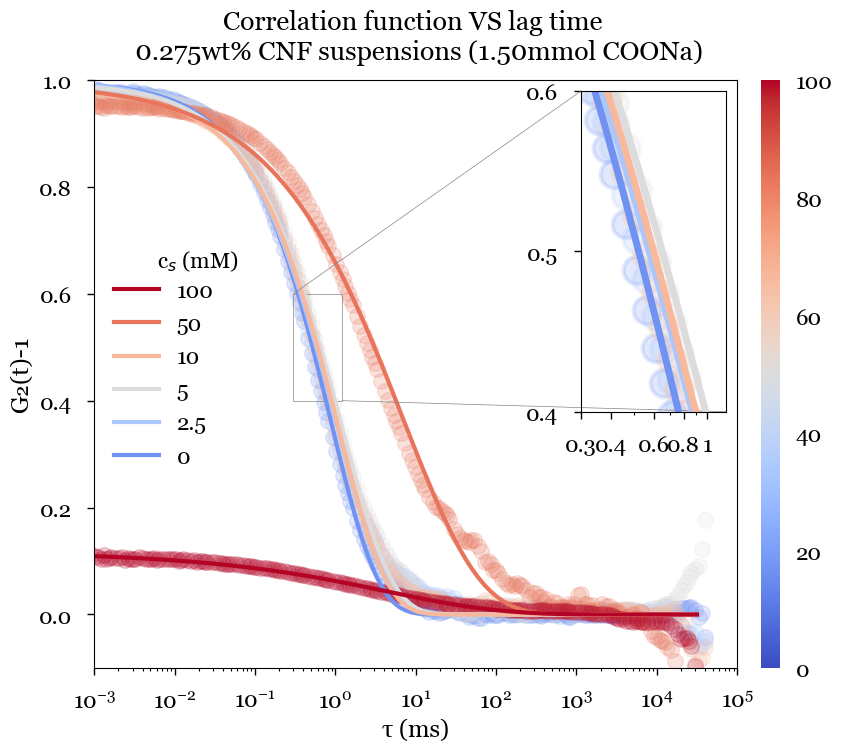

In [199]:
# Plot the fitting

t_fit_cnf0275_0nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_0nacl = g(t_fit_cnf0275_0nacl, A_fit_cnf0275_0nacl, tau_fit_cnf0275_0nacl, beta_fit_cnf0275_0nacl)
t_fit_cnf0275_025nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_025nacl = g(t_fit_cnf0275_025nacl, A_fit_cnf0275_025nacl, tau_fit_cnf0275_025nacl, beta_fit_cnf0275_025nacl)
t_fit_cnf0275_050nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_050nacl = g(t_fit_cnf0275_050nacl, A_fit_cnf0275_050nacl, tau_fit_cnf0275_050nacl, beta_fit_cnf0275_050nacl)
t_fit_cnf0275_100nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_100nacl = g(t_fit_cnf0275_100nacl, A_fit_cnf0275_100nacl, tau_fit_cnf0275_100nacl, beta_fit_cnf0275_100nacl)
t_fit_cnf0275_500nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_500nacl = g(t_fit_cnf0275_500nacl, A_fit_cnf0275_500nacl, tau_fit_cnf0275_500nacl, beta_fit_cnf0275_500nacl)
t_fit_cnf0275_1000nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf0275_1000nacl = g(t_fit_cnf0275_1000nacl, A_fit_cnf0275_1000nacl, tau_fit_cnf0275_1000nacl, beta_fit_cnf0275_1000nacl)

t_fit_cnf0275_110_150_nacl = [t_fit_cnf0275_0nacl, t_fit_cnf0275_025nacl, t_fit_cnf0275_050nacl,
                            t_fit_cnf0275_100nacl, t_fit_cnf0275_500nacl, t_fit_cnf0275_1000nacl]

g_fit_cnf0275_110_150_nacl = [g_fit_cnf0275_0nacl, g_fit_cnf0275_025nacl, g_fit_cnf0275_050nacl,
                            g_fit_cnf0275_100nacl, g_fit_cnf0275_500nacl, g_fit_cnf0275_1000nacl]

#__________________________________________________________________________________________________
# Create a colormap
cmap = plt.get_cmap('coolwarm')
start_index = 1

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf0275_110_150, t_fit_cnf0275_110_150_nacl, g_cnf0275_110_150, g_fit_cnf0275_110_150_nacl, label_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
salt_conc0275_110_150 = label_110_150 

min_value = min(np.min(salt_conc0275_110_150[i]) for i in range(len(salt_conc0275_110_150)))
max_value = max(np.max(salt_conc0275_110_150[i]) for i in range(len(salt_conc0275_110_150)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30) 
cbar.outline.set_visible(False)

#__________________________________________________________________________________________________
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf0275_110_150, t_fit_cnf0275_110_150_nacl, g_cnf0275_110_150, g_fit_cnf0275_110_150_nacl, label_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=5)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = 0.3, 1.2, 0.4, 0.6
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
ax_zoom.set_xscale('log')
xticks = [0.3, 0.4, 0.6, 0.8, 1]
yticks = [0.4,0.5,0.6]
ax_zoom.set_xticks(xticks)
ax_zoom.set_xticklabels(xticks)
ax_zoom.set_yticks(yticks)
ax_zoom.set_yticklabels(yticks)
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='center left', frameon=False)

ax.text(6E-3, 0.65, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.275wt% CNF suspensions (1.50mmol COONa)', pad=15)
#plt.savefig("Correlation function VS Scattering angle 0.2wt% CNF suspensions (1.50mmol COONa) at 65.1deg fit zoom.png", dpi=1500, bbox_inches='tight', transparent=True)
#plt.savefig("Correlation function VS Scattering angle 0.2wt% CNF suspensions (1.50mmol COONa) at 65.1deg fit zoom wbg.png", dpi=1500, bbox_inches='tight')
plt.show()

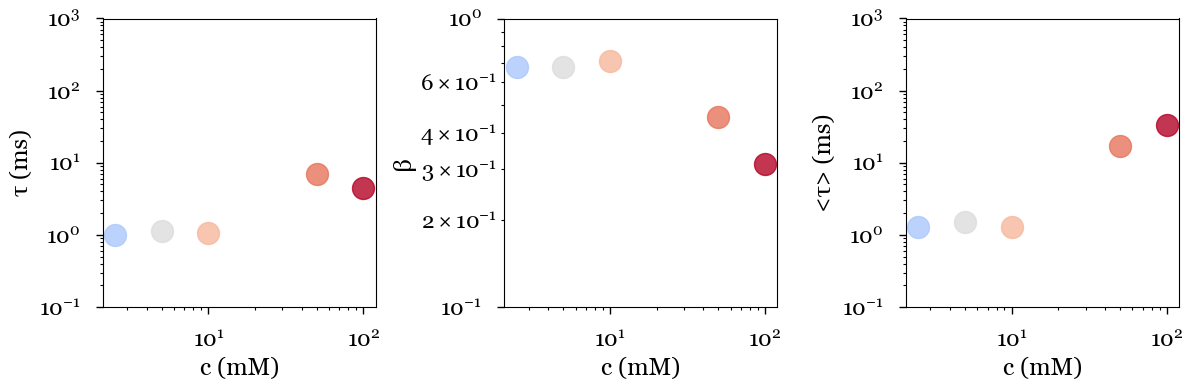

In [200]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('coolwarm')
start_index = 1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc0275_110_150, t_fitted_0275CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 1000)
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xscale("log")

for idx, (x2, y2, label) in enumerate(zip(salt_conc0275_110_150, beta_fitted_0275CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc0275_110_150, meantau_0275CNF_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.275wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

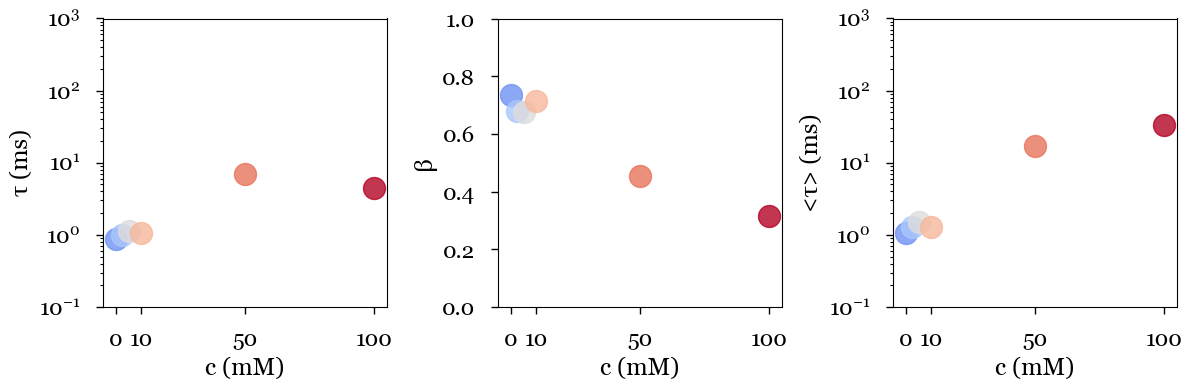

In [201]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('coolwarm')
start_index = 1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc0275_110_150, t_fitted_0275CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 1000)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc0275_110_150, beta_fitted_0275CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc0275_110_150, meantau_0275CNF_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf0275_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.275wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

# 0.55CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

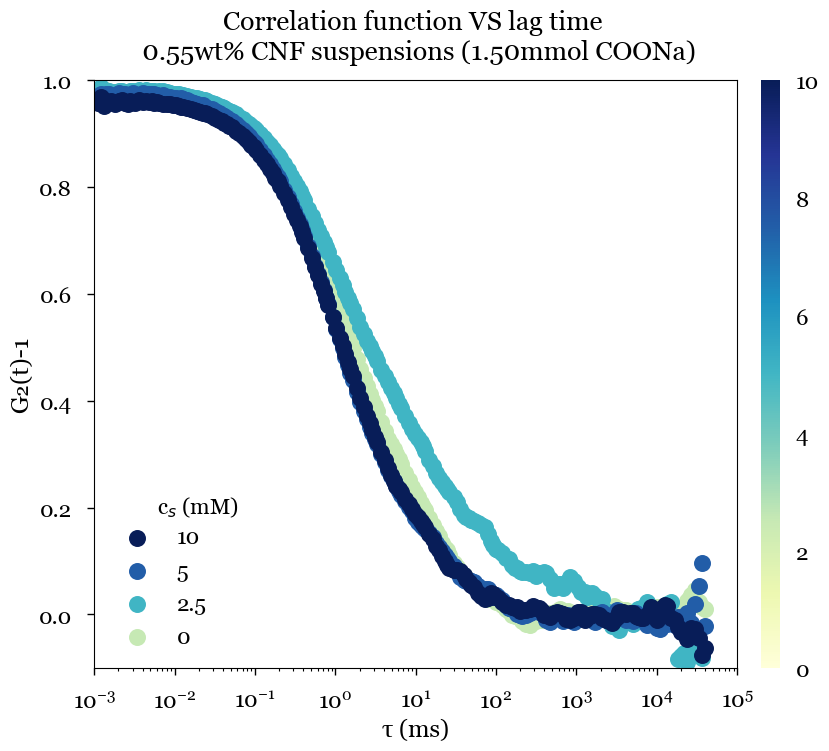

In [202]:
cnf055_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF2.5NaCl/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf055_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF5NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf055_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF10NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf055_0nacl = cnf055.iloc[28:,0]
lagtime_cnf055_0nacl_ms = lagtime_cnf055_0nacl*1000
corrfx_cnf055_0nacl = cnf055.iloc[28:,1]

lagtime_cnf055_025nacl = cnf055_025nacl.iloc[28:,0]
lagtime_cnf055_025nacl_ms = lagtime_cnf055_025nacl*1000
corrfx_cnf055_025nacl = cnf055_025nacl.iloc[28:,1]

lagtime_cnf055_050nacl = cnf055_050nacl.iloc[28:,0]
lagtime_cnf055_050nacl_ms = lagtime_cnf055_050nacl*1000
corrfx_cnf055_050nacl = cnf055_050nacl.iloc[28:,1]

lagtime_cnf055_100nacl = cnf055_100nacl.iloc[28:,0]
lagtime_cnf055_100nacl_ms = lagtime_cnf055_100nacl*1000
corrfx_cnf055_100nacl = cnf055_100nacl.iloc[28:,1]

t_cnf055_110_150 = [lagtime_cnf055_0nacl_ms, lagtime_cnf055_025nacl_ms, lagtime_cnf055_050nacl_ms,
                   lagtime_cnf055_100nacl_ms]
g_cnf055_110_150 = [corrfx_cnf055_0nacl, corrfx_cnf055_025nacl, corrfx_cnf055_050nacl,
                   corrfx_cnf055_100nacl]
label_cnf055_110_150 = [0, 2.5, 5, 10]

#__________________________________________________________________________________________________

cmap = plt.get_cmap('YlGnBu')
start_index = 1

fig, ax = plt.subplots(figsize=(8,6))

for idx, (x, y, label) in enumerate(zip(t_cnf055_110_150, g_cnf055_110_150, label_cnf055_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
#__________________________________________________________________________________________________

min_value = min(np.min(label_cnf055_110_150[i]) for i in range(len(label_cnf055_110_150)))
max_value = max(np.max(label_cnf055_110_150[i]) for i in range(len(label_cnf055_110_150)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)
cbar.outline.set_visible(False)

handles, labels = ax.get_legend_handles_labels()

handles = handles[::-1]
labels = labels[::-1]

ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.19, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.55wt% CNF suspensions (1.50mmol COONa)', pad=15)
#plt.savefig("Correlation function VS Scattering angle 0.55wt% CNF suspensions (1.50mmol COONa) at 65.1deg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

In [203]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf055_0nacl = lagtime_cnf055_0nacl_ms
g_t_cnf055_0nacl = corrfx_cnf055_0nacl
t_cnf055_025nacl = lagtime_cnf055_025nacl_ms
g_t_cnf055_025nacl = corrfx_cnf055_025nacl
t_cnf055_050nacl = lagtime_cnf055_050nacl_ms
g_t_cnf055_050nacl = corrfx_cnf055_050nacl
t_cnf055_100nacl = lagtime_cnf055_100nacl_ms
g_t_cnf055_100nacl = corrfx_cnf055_100nacl

p0 = [1, 1, 1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1.1])

params_cnf055_0nacl, cov_cnf055_0nacl = curve_fit(g, t_cnf055_0nacl, g_t_cnf055_0nacl, p0, bounds=bounds)
A_fit_cnf055_0nacl, tau_fit_cnf055_0nacl, beta_fit_cnf055_0nacl = params_cnf055_0nacl

params_cnf055_025nacl, cov_cnf055_025nacl = curve_fit(g, t_cnf055_025nacl, g_t_cnf055_025nacl, p0, bounds=bounds)
A_fit_cnf055_025nacl, tau_fit_cnf055_025nacl, beta_fit_cnf055_025nacl = params_cnf055_025nacl

params_cnf055_050nacl, cov_cnf055_050nacl = curve_fit(g, t_cnf055_050nacl, g_t_cnf055_050nacl, p0, bounds=bounds)
A_fit_cnf055_050nacl, tau_fit_cnf055_050nacl, beta_fit_cnf055_050nacl = params_cnf055_050nacl

params_cnf055_100nacl, cov_cnf055_100nacl = curve_fit(g, t_cnf055_100nacl, g_t_cnf055_100nacl, p0, bounds=bounds)
A_fit_cnf055_100nacl, tau_fit_cnf055_100nacl, beta_fit_cnf055_100nacl = params_cnf055_100nacl

# Table using DataFrame
samples_055CNF_110_150_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl']
A_fitted_055CNF_110_150_NaCl = [A_fit_cnf055_0nacl, A_fit_cnf055_025nacl, A_fit_cnf055_050nacl, A_fit_cnf055_100nacl]
t_fitted_055CNF_110_150_NaCl = [tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl]
beta_fitted_055CNF_110_150_NaCl =  [beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl]

# mean tau calculations
meantau_cnf055s_110_150_nacl = ["meantau_0.05wt.%CNF_0mMnacl", "meantau_0.05wt.%CNF_2.5mMnacl", "meantau_0.05wt.%CNF_5mMnacl", "meantau_0.05wt.%CNF_10mMnacl", "meantau_0.05wt.%CNF_50mMnacl", "meantau_0.05wt.%CNF_100mMnacl"]
meantau_cnf055s_110_150 = {}
for i in range(len(t_fitted_055CNF_110_150_NaCl)):
    meantau_cnf055_110_150 = (t_fitted_055CNF_110_150_NaCl[i]/beta_fitted_055CNF_110_150_NaCl[i])*scipy.special.gamma(1/beta_fitted_055CNF_110_150_NaCl[i])
    name = meantau_cnf055s_110_150_nacl[i]
    meantau_cnf055s_110_150[name] = meantau_cnf055_110_150
    
meantau_055CNF_110_150 = np.array(list(meantau_cnf055s_110_150.values()))


table_Parameters_055CNF_NaCl = {
    '0.55wt.%CNF with': samples_055CNF_110_150_NaCl ,
    'A' : A_fitted_055CNF_110_150_NaCl,
    '\u03C4 (ms)': t_fitted_055CNF_110_150_NaCl,
    '\u03B2': beta_fitted_055CNF_110_150_NaCl,
    '<\u03C4> (ms)': meantau_055CNF_110_150
}

table_Parameters_055CNF_NaCl_draw = pd.DataFrame(table_Parameters_055CNF_NaCl)

styled_table_Parameters_055CNF_NaCl_draw = table_Parameters_055CNF_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Greens') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_055CNF_NaCl_draw    

0.55wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM NaCl,1.000,4.153,0.511,7.98
2.5mM NaCl,1.000,9.714,0.413,29.64
5mM NaCl,1.000,3.052,0.526,5.58
10mM NaCl,1.000,3.101,0.507,6.06


In [204]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_055CNF_NaCl = styled_table_Parameters_055CNF_NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_055CNF_NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.55wt.%CNF with NaCl.png', options=options)

True

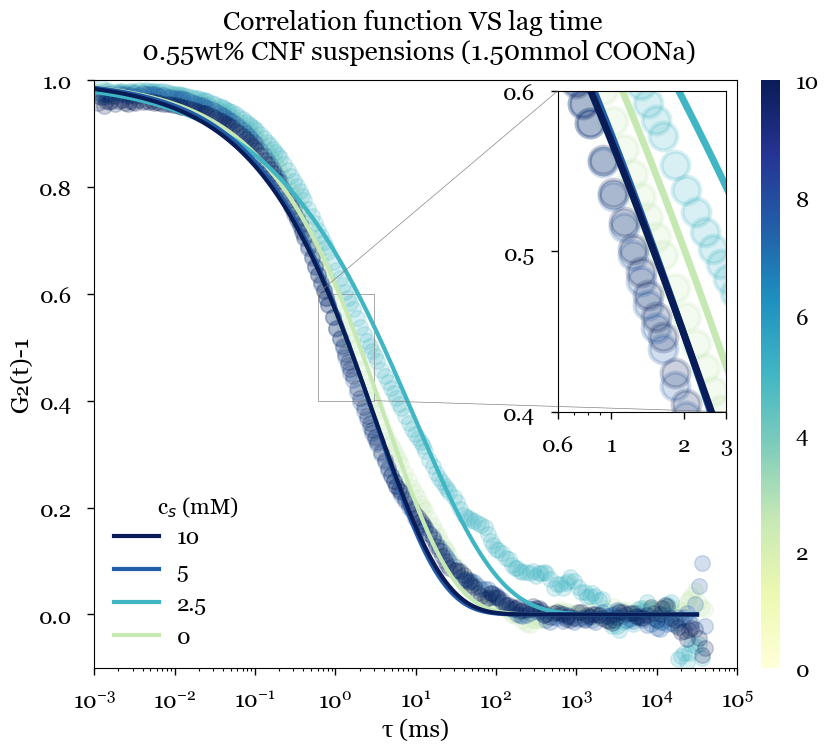

In [206]:
# Plot the fitting

t_fit_cnf055_0nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_0nacl = g(t_fit_cnf055_0nacl, A_fit_cnf055_0nacl, tau_fit_cnf055_0nacl, beta_fit_cnf055_0nacl)
t_fit_cnf055_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_025nacl = g(t_fit_cnf055_025nacl, A_fit_cnf055_025nacl, tau_fit_cnf055_025nacl, beta_fit_cnf055_025nacl)
t_fit_cnf055_050nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_050nacl = g(t_fit_cnf055_050nacl, A_fit_cnf055_050nacl, tau_fit_cnf055_050nacl, beta_fit_cnf055_050nacl)
t_fit_cnf055_100nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_100nacl = g(t_fit_cnf055_100nacl, A_fit_cnf055_100nacl, tau_fit_cnf055_100nacl, beta_fit_cnf055_100nacl)

t_fit_cnf055_110_150_nacl = [t_fit_cnf055_0nacl, t_fit_cnf055_025nacl, t_fit_cnf055_050nacl,
                            t_fit_cnf055_100nacl]

g_fit_cnf055_110_150_nacl = [g_fit_cnf055_0nacl, g_fit_cnf055_025nacl, g_fit_cnf055_050nacl,
                            g_fit_cnf055_100nacl]
#__________________________________________________________________________________________________
# Create a colormap
cmap = plt.get_cmap('YlGnBu')
start_index = 1

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, y1, x2, y2, label) in enumerate(zip(t_cnf055_110_150, g_cnf055_110_150, t_fit_cnf055_110_150_nacl, g_fit_cnf055_110_150_nacl, label_cnf055_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
   # scatter1.set_facecolor('none')
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc055_110_150 = label_cnf055_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc055_110_150[i]) for i in range(len(salt_conc055_110_150)))
max_value = max(np.max(salt_conc055_110_150[i]) for i in range(len(salt_conc055_110_150)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf055_110_150, t_fit_cnf055_110_150_nacl, g_cnf055_110_150, g_fit_cnf055_110_150_nacl, label_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=5)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = 0.6, 3, 0.4, 0.6
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
ax_zoom.set_xscale('log')
xticks = [0.6, 1, 2, 3]
yticks = [0.4,0.5,0.6]
ax_zoom.set_xticks(xticks)
ax_zoom.set_xticklabels(xticks)
ax_zoom.set_yticks(yticks)
ax_zoom.set_yticklabels(yticks)
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.19, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.55wt% CNF suspensions (1.50mmol COONa)', pad=15)
#plt.savefig("Correlation function VS Scattering angle 0.55wt% CNF suspensions (1.50mmol COONa) at 65.1deg fit zoom.png", dpi=1500, bbox_inches='tight', transparent=True)
#plt.savefig("Correlation function VS Scattering angle 0.55wt% CNF suspensions (1.50mmol COONa) at 65.1deg fit zoom wbg.png", dpi=1500, bbox_inches='tight')
plt.show()

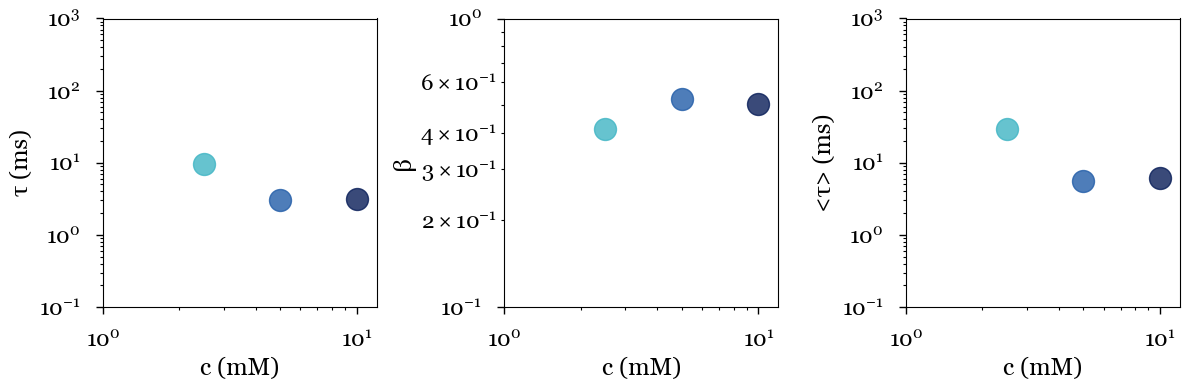

In [207]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('YlGnBu')
start_index = 1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc055_110_150, t_fitted_055CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1,1000)
axes[0].set_xlim(1,12)
#axes[0].set_xticks([2, 3, 4, 6, 10])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xscale("log")

for idx, (x2, y2, label) in enumerate(zip(salt_conc055_110_150, beta_fitted_055CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,12)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc055_110_150, meantau_055CNF_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xlim(1,12)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.55wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

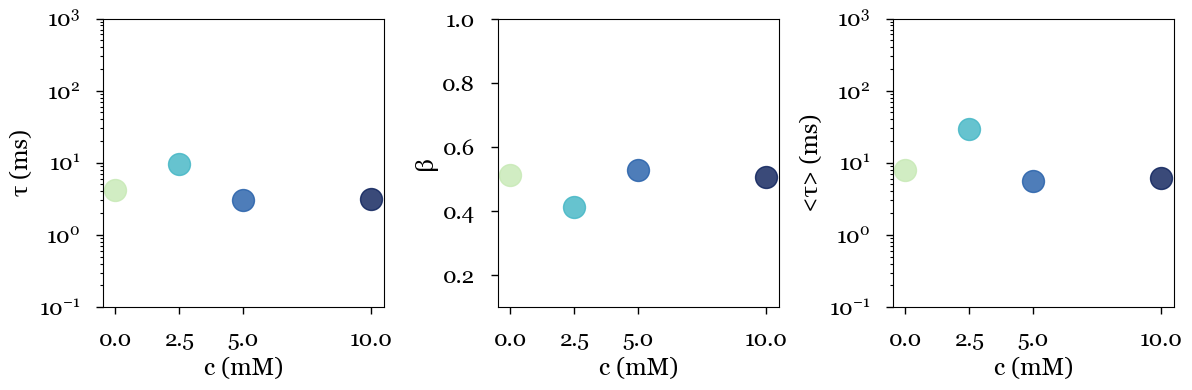

In [208]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap = plt.get_cmap('YlGnBu')
start_index = 1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc055_110_150, t_fitted_055CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(0.1,1)
axes[0].set_ylim(0.1,1000)
axes[0].set_xticks([0, 2.5, 5, 10])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_yscale("log")

for idx, (x2, y2, label) in enumerate(zip(salt_conc055_110_150, beta_fitted_055CNF_110_150_NaCl, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xticks([0, 2.5, 5, 10])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc055_110_150, meantau_055CNF_110_150, label_110_150)):
    c = cmap(float(idx + start_index) / len(t_cnf055_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 2.5, 5, 10])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Parameters as functions of NaCl concentrations 0.55wt.%CNF (1.50 mmol) at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

In [273]:
salt_conc055_110_150.extend([np.nan, np.nan])
t_fitted_055CNF_110_150_NaCl.extend([np.nan, np.nan])
beta_fitted_055CNF_110_150_NaCl.extend([np.nan, np.nan]) 
empty_data = np.array([np.nan, np.nan])
meantau_055CNF_110_150 = np.concatenate((meantau_055CNF_110_150, empty_data))

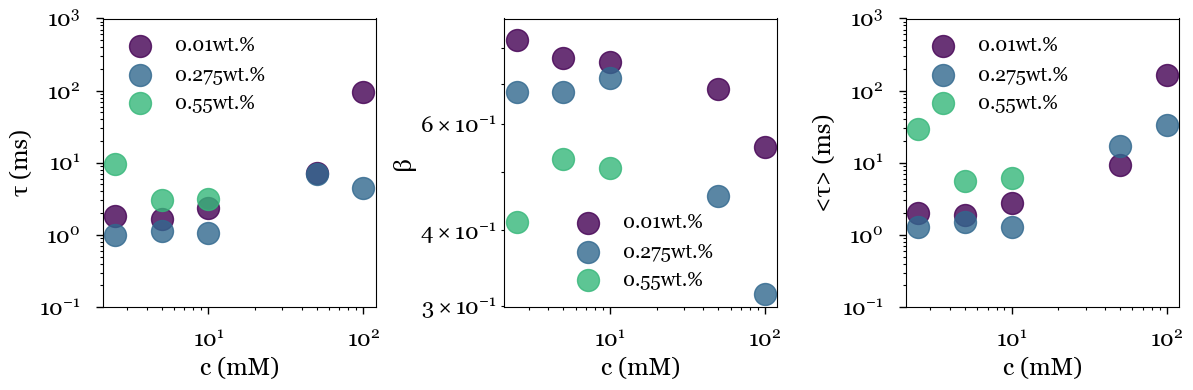

In [219]:
plt.style.use('_mpl-gallery-nogrid')

cnf_c_label_110_150 = ['0.01wt.%', '0.275wt.%', '0.55wt.%']
salt_c_all_110_150 = [salt_conc001_110_150, salt_conc0275_110_150, salt_conc055_110_150]
tau_all_110_150 = [t_fitted_001CNF_110_150_NaCl, t_fitted_0275CNF_110_150_NaCl, t_fitted_055CNF_110_150_NaCl]
beta_all_110_150 = [beta_fitted_001CNF_110_150_NaCl, beta_fitted_0275CNF_110_150_NaCl, beta_fitted_055CNF_110_150_NaCl]
meantau_all_110_150 = [meantau_001CNF_110_150, meantau_0275CNF_110_150, meantau_055CNF_110_150]

cmap = plt.get_cmap('viridis')
start_index = 0

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].set_ylim(0.1, 1000)
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].legend(frameon = False, fontsize = 14)

for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
#axes[1].set_ylim(0,1)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].legend(frameon = False)
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].legend(frameon = False, fontsize = 14, loc = 'lower center')

for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].legend(frameon = False, fontsize = 14)

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations with CNF (1.50 mmol) at 65.1\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/2873245243.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


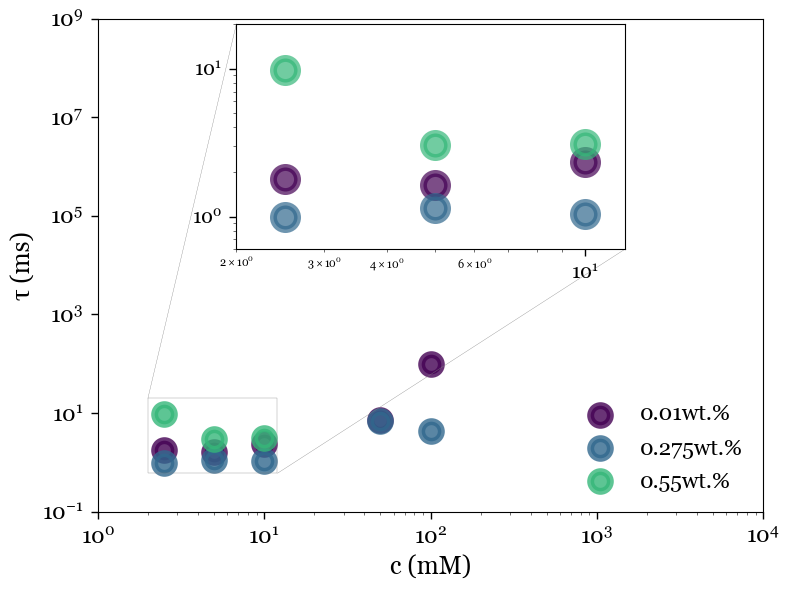

In [234]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c), s=200, alpha=0.8, marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

ax.set_xlabel('c (mM)')
ax.set_ylabel('\u03C4 (ms)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1, 10000)
ax.set_ylim(0.1, 1000000000)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')

ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper center')

for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s=300, alpha=0.7, marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

x1, x2, y1, y2 = 2, 12, 0.6, 20
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.set_yscale("log")
ax_zoom.set_xscale("log")
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=16, loc='lower right')

ax.set_xlabel('c (mM)', fontsize=18)
ax.set_ylabel('\u03C4 (ms)', fontsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=16)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=16)

plt.tight_layout()
#plt.savefig("Realaxation time vs NaCl concentrations All_Zoom loglog.png", dpi=1500, bbox_inches='tight', transparent = True)
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/3891969728.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


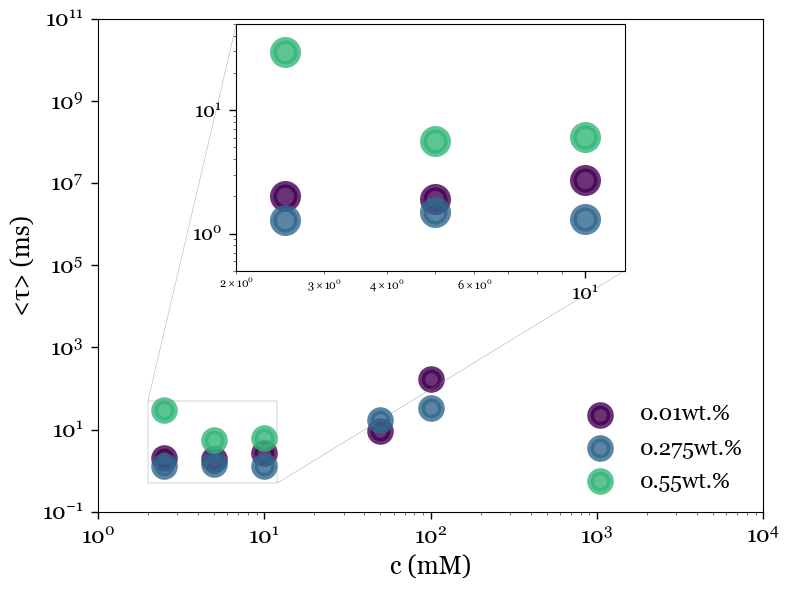

In [235]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

# Plot the data
for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter3 = ax.scatter(x3, y3, c=np.atleast_2d(c), s=200, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

ax.set_xlabel('c (mM)')
ax.set_ylabel('<\u03C4> (ms)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.1, 100000000000)
ax.set_xlim(1, 10000)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')

ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper center')

for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = ax_zoom.scatter(x3, y3, c=np.atleast_2d(c), s=300, alpha=0.8,
                               marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

x1, x2, y1, y2 = 2, 12, 0.5, 50
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.set_xticks([2, 5, 10])
ax_zoom.set_yscale("log")
ax_zoom.set_xscale("log")
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=16, loc='lower right')

ax.set_xlabel('c (mM)', fontsize=18)
ax.set_ylabel('<\u03C4> (ms)', fontsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=16)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=16)

plt.tight_layout()
#plt.savefig("Mean Realaxation time vs NaCl concentrations All_Zoom loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/217416186.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


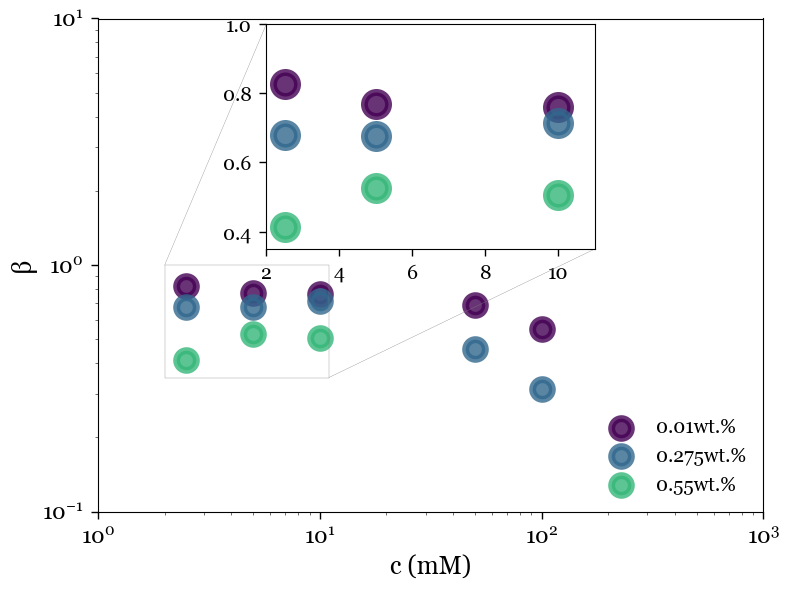

In [237]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

# Plot the data
for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = ax.scatter(x2, y2, marker='o', facecolors=c, c=np.atleast_2d(c), s=200, 
                          edgecolors=c, linewidths=5, label=label, alpha=0.8)

ax.set_xlabel('c (mM)')
ax.set_ylabel('\u03C4 (ms)')
ax.set_ylim(0.1, 10)
ax.set_xlim(1, 1000)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')

# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=2, loc='upper center')

# Plot the zoomed-in region
for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = ax_zoom.scatter(x2, y2, marker='o', facecolors=c, c=np.atleast_2d(c), s=300, 
                               edgecolors=c, linewidths=5, label=label, alpha=0.8)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = 2, 11, 0.35, 1
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
#ax_zoom.set_xticks([0, 5, 10, 12])
#ax_zoom.set_yticks([0.4, 0.6, 1])
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=14, loc='lower right')

ax.set_xlabel('c (mM)', fontsize=18)
ax.set_ylabel('\u03B2', fontsize=18)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=16)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=16)

plt.tight_layout()
#plt.savefig("Stretched Exponent vs NaCl concentrations All_Zoom loglog.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

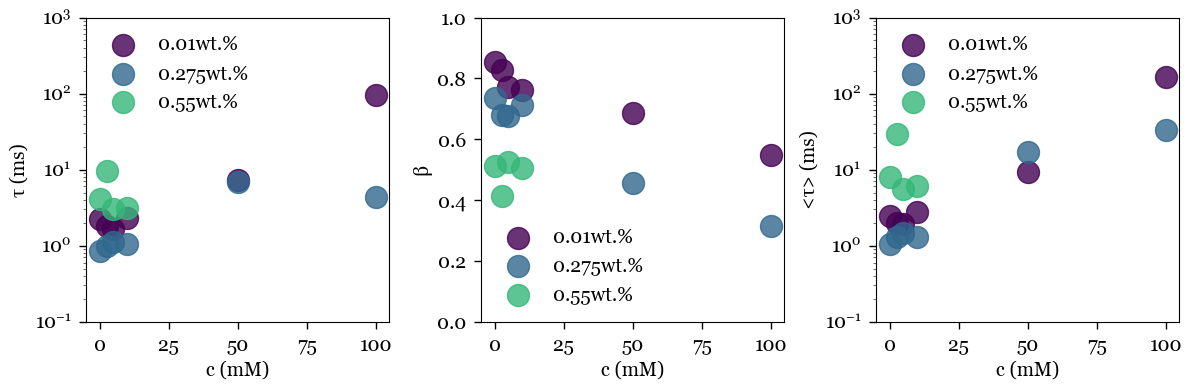

In [238]:
cmap = plt.get_cmap('viridis')
start_index = 0

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c),  s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)', fontsize = 14)
axes[0].set_ylabel('\u03C4 (ms)', fontsize = 14)
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 1000)
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[0].legend(frameon = False, fontsize = 14)

for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)', fontsize = 14)
axes[1].set_ylabel('\u03B2', fontsize = 14)
axes[1].set_ylim(0,1)
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[1].legend(frameon = False, fontsize = 14)

for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)', fontsize = 14)
axes[2].set_ylabel('<\u03C4> (ms)', fontsize = 14)
axes[2].set_ylim(0.1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize = 14)
axes[2].set_yscale("log")
axes[2].legend(frameon = False, fontsize = 14)

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations with CNF (1.50 mmol) at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/153628763.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


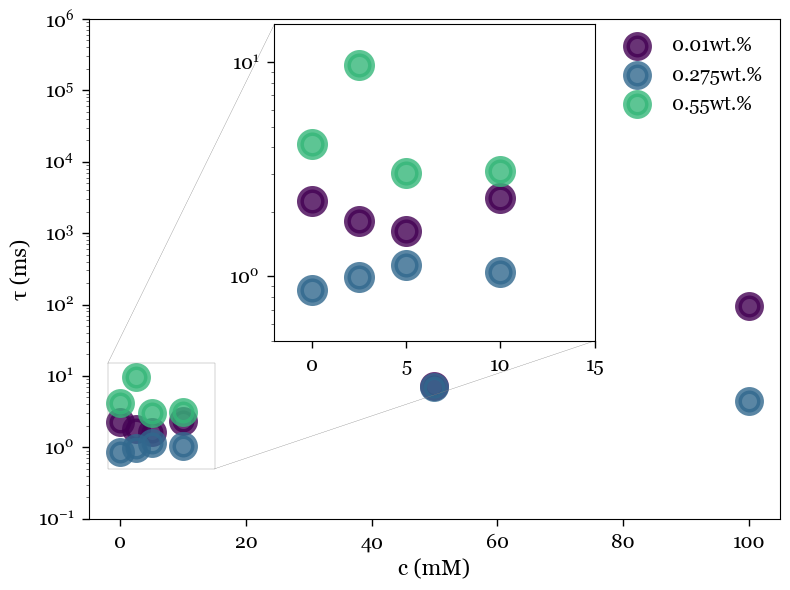

In [239]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

ax.set_xlabel('c (mM)', fontsize = 14)
ax.set_ylabel('\u03C4 (ms)', fontsize = 14)
ax.set_yscale("log")
ax.set_ylim(0.1, 1000000)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.legend(frameon = False, fontsize = 14)

# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper center')

# Plot the zoomed-in region
for idx, (x1, y1, label) in enumerate(zip(salt_c_all_110_150, tau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter1 = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = -2, 15, 0.5, 15
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.set_xticks([0, 5, 10, 15])
ax_zoom.set_yscale("log")
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=14, loc='upper right')

ax.set_xlabel('c (mM)', fontsize=16)
ax.set_ylabel('\u03C4 (ms)', fontsize=16)
#for ax in axs.flat:
    #ax.tick_params(axis='both', labelsize=12, which='both', width=2)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

plt.tight_layout()
#plt.savefig("Realaxation time vs NaCl concentrations All_Zoom.png", dpi=1500, bbox_inches='tight', transparent = True)
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/2738237465.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


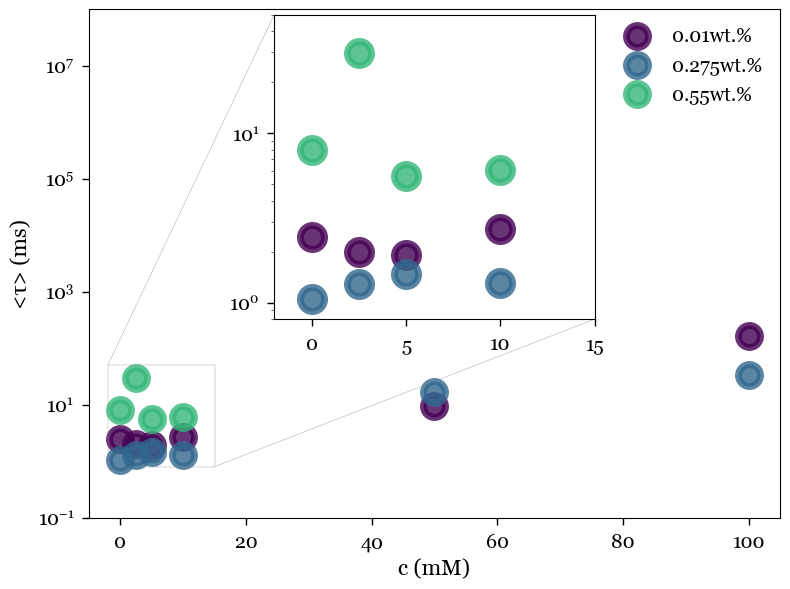

In [240]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter3 = ax.scatter(x3, y3, c=np.atleast_2d(c), s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

ax.set_xlabel('c (mM)', fontsize = 14)
ax.set_ylabel('<\u03C4> (ms)', fontsize = 14)
ax.set_yscale("log")
ax.set_ylim(0.1, 100000000)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.legend(frameon = False, fontsize = 14)

# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper center')

# Plot the zoomed-in region
for idx, (x3, y3, label) in enumerate(zip(salt_c_all_110_150, meantau_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter3 = ax_zoom.scatter(x3, y3, c=np.atleast_2d(c), s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

x1, x2, y1, y2 = -2, 15, 0.8, 50
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.set_xticks([0, 5, 10, 15])
ax_zoom.set_yscale("log")
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=14, loc='upper right')

ax.set_xlabel('c (mM)', fontsize=16)
ax.set_ylabel('<\u03C4> (ms)', fontsize=16)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

plt.tight_layout()
#plt.savefig("Mean Realaxation time vs NaCl concentrations All_Zoom.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

/var/folders/4d/v_vz1zvn7q5f3rtvmpwqqvww0000gn/T/ipykernel_28011/170095871.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


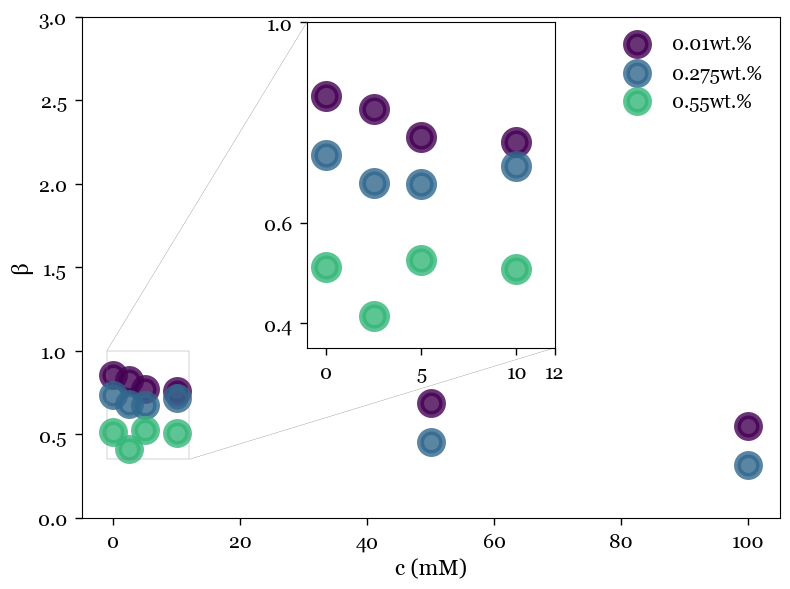

In [241]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'

fig, ax = plt.subplots(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
start_index = 0

for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = ax.scatter(x2, y2, c=np.atleast_2d(c),  s=250, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

ax.set_xlabel('c (mM)', fontsize = 14)
ax.set_ylabel('\u03C4 (ms)', fontsize = 14)
ax.set_ylim(0, 3)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.legend(frameon = False, fontsize = 14)

# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper center')

# Plot the zoomed-in region
for idx, (x2, y2, label) in enumerate(zip(salt_c_all_110_150, beta_all_110_150, cnf_c_label_110_150)):
    c = cmap(float(idx + start_index) / len(salt_c_all_110_150))
    scatter2 = ax_zoom.scatter(x2, y2, c=np.atleast_2d(c),  s=300, alpha=0.8,
                marker='o', facecolors=c, edgecolors=c, linewidths=5, label=label)

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = -1, 12, 0.35, 1
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.set_xticks([0, 5, 10, 12])
ax_zoom.set_yticks([0.4, 0.6, 1])
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=14, loc='upper right')

ax.set_xlabel('c (mM)', fontsize=16)
ax.set_ylabel('\u03B2', fontsize=16)
#for ax in axs.flat:
    #ax.tick_params(axis='both', labelsize=12, which='both', width=2)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

plt.tight_layout()
plt.savefig("Stretched Exponent vs NaCl concentrations All_Zoom.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()